In [2]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from prophet import Prophet


Importing plotly failed. Interactive plots will not work.


In [ ]:
#pip install fbprophet

In [3]:
df = pd.read_csv(r'../Data/WeeklyF.csv')

In [4]:
df['Year']= pd. DatetimeIndex(df['Date']).year

In [5]:
#df =df2
df = df.rename(columns={'Date': 'ds', 'Failure Rate': 'y'})


In [6]:
df.head()

,ds,y,Temp,Rain,Year
0,1/3/2016,1,22.224286,3.950000,2016
1,1/10/2016,17,21.480000,1.128571,2016
2,1/17/2016,9,20.708571,0.457143,2016
3,1/24/2016,8,20.581429,0.000000,2016
4,1/31/2016,8,21.034286,0.600000,2016


# 5-Fold Cross Validation

In [7]:
forecast = pd.DataFrame()
for year in [2017,2018,2019,2020,2021]:
    orig=df[df['Year']!=2016].copy()
    df_val=df[df['Year'] ==year]
    validate = df_val
    indecies=validate.ds
    train = df[df['Year'] !=year]
    m = Prophet(yearly_seasonality=True)
    m.add_regressor('Temp')
#    m.add_regressor('Ferrule_Failures')
#    m.add_regressor('Water_Failures')
    m.add_regressor('Rain')
    m.fit(train)
    future = pd.DataFrame({"ds":list(indecies)})
    future['Temp'] = validate['Temp'].values 
#    future['Ferrule_Failures'] = validate['Ferrule_Failures'].values 
#    future['Water_Failures'] = validate['Water_Failures'].values 
    future['Rain'] = validate['Rain'].values 
    f = m.predict(future)
    if year == 2017:
        forecast=f
    else:
        forecast=forecast.append(f)
    


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
/tmp/ipykernel_31265/1101874781.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  forecast=forecast.append(f)
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
/tmp/ipykernel_

In [8]:
def timeseries_evaluation_metrics_func(y_true, y_pred):
    
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    #print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

In [9]:
timeseries_evaluation_metrics_func(orig.y,forecast.yhat)

MSE is : 33.3896598787538
MAE is : 4.467563896805651
RMSE is : 5.778378654843744
MAPE is : 47.725061350917706
R2 is : 0.3535590288977194



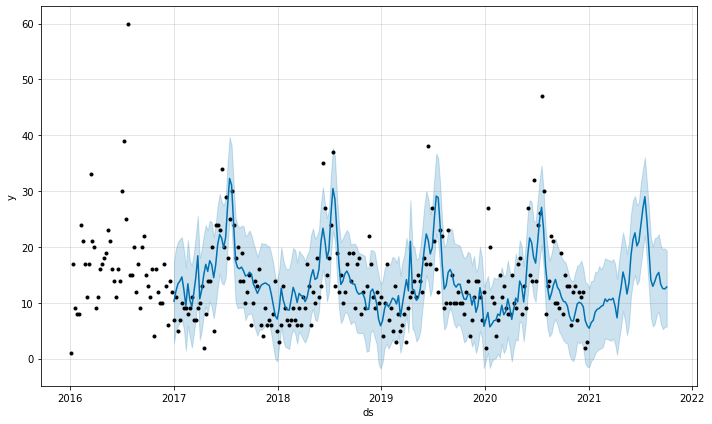

In [10]:
fig1 = m.plot(forecast)

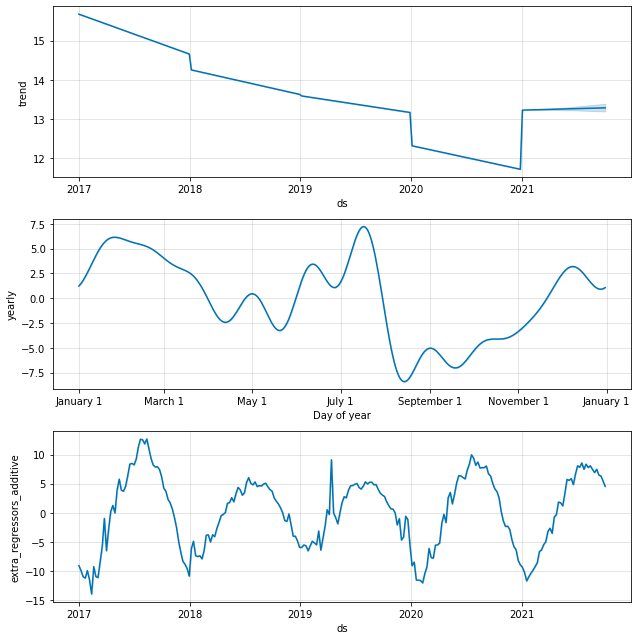

In [11]:
fig2 = m.plot_components(forecast)

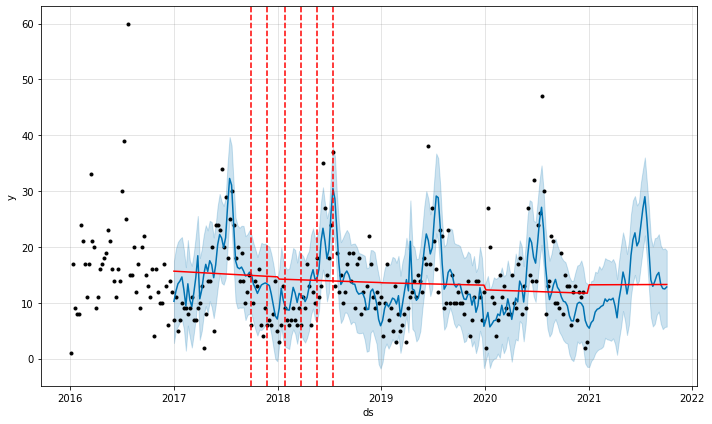

In [13]:
from prophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should

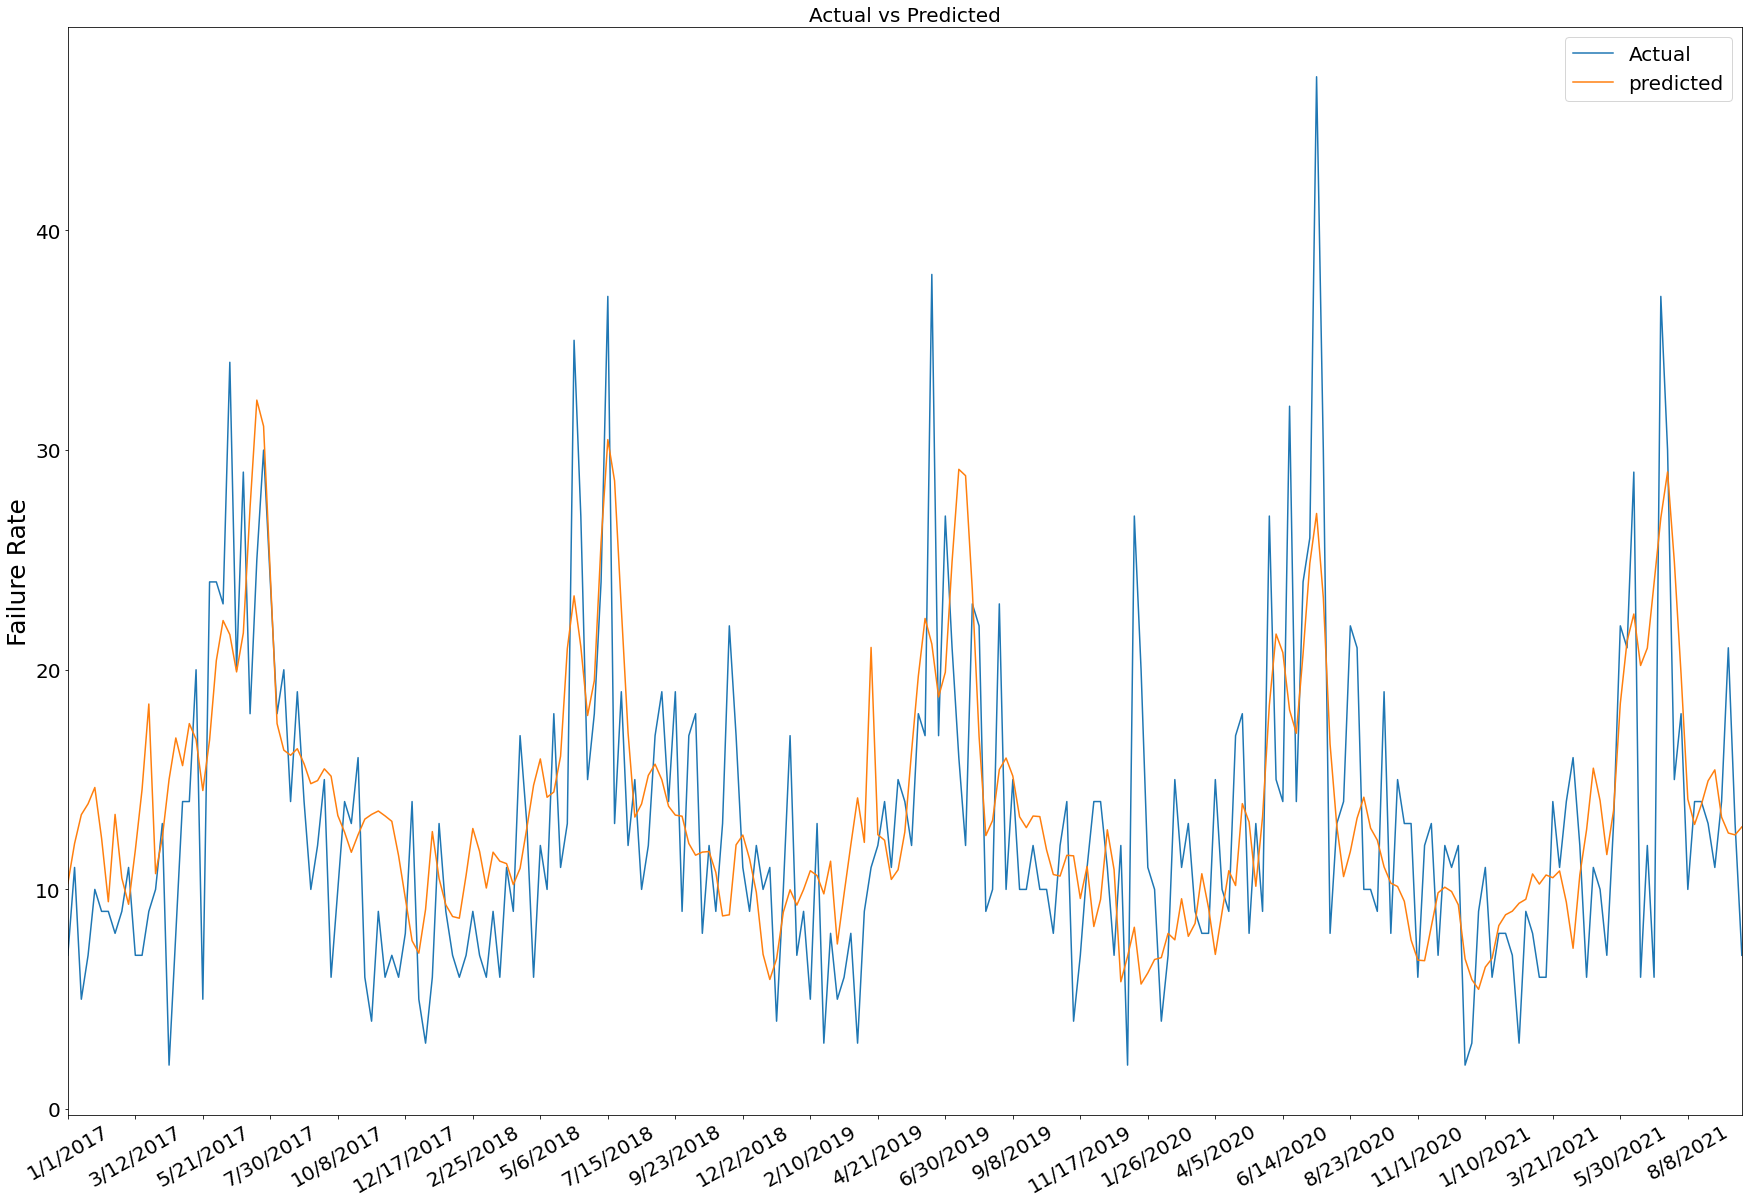

In [21]:
import matplotlib.dates as mdates
plt.plot( list(orig.ds),list(orig.y))
plt.plot( list(orig.ds),list(forecast.yhat))
plt.title("Actual vs Predicted")
plt.ylabel("Failure Rate")
plt.legend(('Actual','predicted'))
plt.rcParams["figure.figsize"] = [30,20]
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y')) 

# Change the tick interval
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10)) 

# Puts x-axis labels on an angle
plt.gca().xaxis.set_tick_params(rotation = 30)  

# Changes x-axis range
plt.gca().set_xbound(list(orig.ds)[0], list(orig.ds)[-1])


SMALL_SIZE = 20
MEDIUM_SIZE = 25
BIGGER_SIZE = 30

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.show()

In [20]:
diff=abs(np.asarray(orig.y)-np.asarray(forecast.yhat).reshape(-1))/np.asarray(forecast.yhat).reshape(-1)

In [ ]:
import matplotlib.dates as mdates
plt.plot( orig.ds,diff *(diff>0.25))
#plt.plot( orig.ds,np.asarray(orig.y)/np.max(np.asarray(orig.y)))
plt.plot( orig.ds,orig.Rain/np.max(orig.Rain))
plt.legend(('Diff','Rain'))
plt.rcParams["figure.figsize"] = [30,20]
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y')) 

# Change the tick interval
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10)) 

# Puts x-axis labels on an angle
plt.gca().xaxis.set_tick_params(rotation = 30)  

# Changes x-axis range
plt.gca().set_xbound(list(orig.ds)[0], list(orig.ds)[-1])
plt.show()